In [1]:
%matplotlib inline
import gsw
from scipy.io import loadmat
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [2]:
data = loadmat('a20_station64.mat')
print(data.keys()) # This prints the names of the variables in "data"

salinity = data['salinity']
pressure = data['pressure']
temperature = data['temperature']

dict_keys(['__header__', '__version__', '__globals__', 'latitude', 'longitude', 'woce_date', 'pressure', 'temperature', 'salinity'])


In [3]:
potentialtemp = gsw.pt0_from_t(salinity,temperature,pressure)
print('potentialtemp dimensions = ',potentialtemp.shape) # This prints the dimensions of the variable potentialtemp

potentialtemp dimensions =  (2637, 1)


In [4]:
print(potentialtemp)

[[27.8338653 ]
 [27.87009521]
 [27.87772508]
 ...
 [ 1.22256617]
 [ 1.2225063 ]
 [ 1.22254361]]


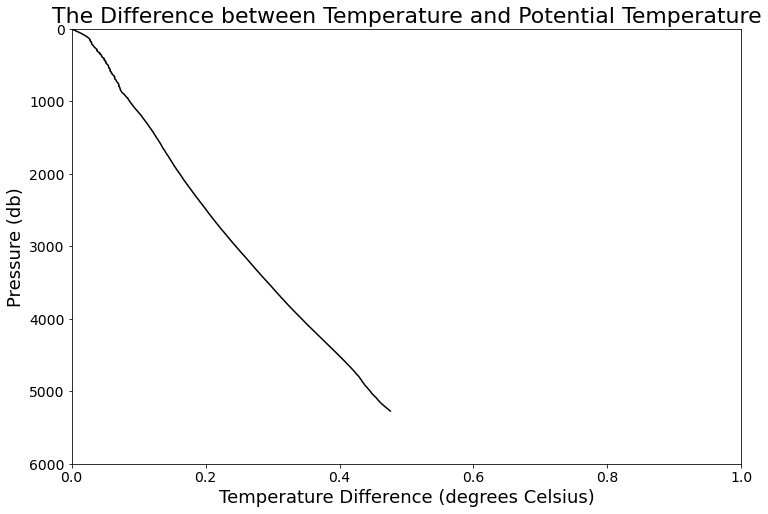

In [5]:
plt.figure(figsize=(12,8))
plt.plot(temperature-potentialtemp,pressure,'k')
plt.gca().invert_yaxis() # Invert y-axis so that zero-pressure is at the top
plt.xlabel('Temperature Difference (degrees Celsius)',fontsize=18)
plt.xticks(fontsize=14)
plt.ylabel('Pressure (db)',fontsize=18)
plt.yticks(fontsize=14)
plt.title('The Difference between Temperature and Potential Temperature',fontsize=22)
plt.xlim(0,1)
plt.ylim(6000,0)
plt.savefig('temperature-potentialtemperature.png')

1. 
    a) Plot shown above.
    b) Potential temperature is less than temperature.
    c) Potential temperature is less than temperature because potential temperature does not take compressibility or pressure effects into account. As pressure builds deeper in the ocean, the parcel of water compresses a little bit (has work done on it by the environment) so warms up a bit. However, potential temperature ignores the effects of pressure so the potential temperature is less than the temperature.
    d) The difference between potential temperature and temperature increases with increasing pressure.
    e) The more pressure, the more work the environment does on the parcel, the more energy/heat is added to the parcel, the greater the temperature will get and the farther that temperature will get from the potential temperature. 
    f) The maximum difference I see between the temperature and potential temperature is almost 0.5 degrees Celsius at the greatest depth/pressure (almost 5500 db).

In [6]:
# First convert in situ temperature into conservative temperature (needed for inputs in the following functions)
cons_temperature = gsw.CT_from_t(salinity,temperature,pressure)

density = gsw.rho(salinity,cons_temperature,pressure)
sigma0 = gsw.sigma0(salinity,cons_temperature) + 1000 # Note: in the documentation, it explains that there is an offset by 1000 that we account for here
sigma2000 = gsw.sigma2(salinity,cons_temperature) + 1000
sigma4000 = gsw.sigma4(salinity,cons_temperature) + 1000

print((np.max(density)-np.min(density))/np.mean(density))
print((np.max(sigma0)-np.min(sigma0))/np.mean(sigma0))
print((np.max(sigma2000)-np.min(sigma2000))/np.mean(sigma2000))
print((np.max(sigma4000)-np.min(sigma4000))/np.mean(sigma4000))

0.02772397443713354
0.00520785374269211
0.00611928651370942
0.006969162777842918


2.
    a) The relative variations for density and the three potential densities (sigma0, sigma2000, and sigma4000) are 0.0277, 0.0052, 0.0061, and 0.0070, respectively.
    b) Temperature has the greatest effect on in-situ density. This makes sense because temperature determines how fast molecules move and how much space they take up, plus the coldest water is at the bottom of the ocean and the warmest is at the top, just as the most dense must be at the bottom and the least dense at the top. Pressure does not have a huge effect because density and potential density are not very different since water is not very compressible.
    c) Density increases monotonically with depth and is thereby stably stratified. The potential densities do not.

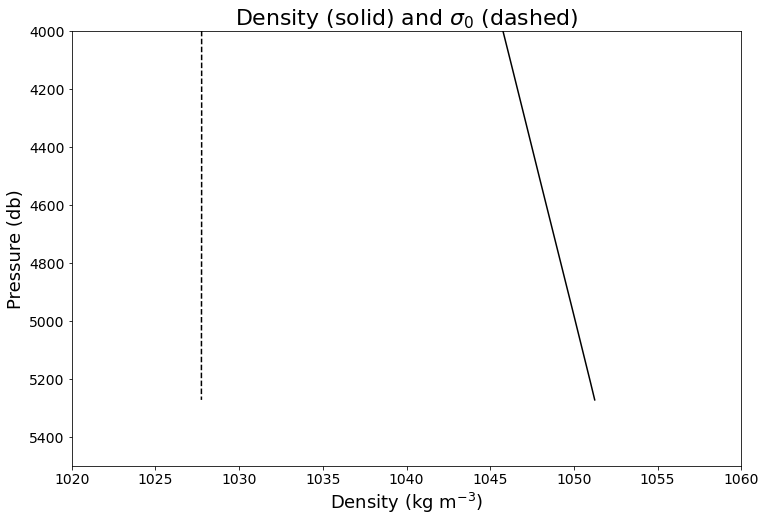

In [7]:
plt.figure(figsize=(12,8))
plt.plot(density,pressure,'k-')
plt.plot(sigma0,pressure,'k--')
plt.ylim(5500,4000)
plt.xlim(1020,1060)
plt.xlabel('Density (kg m$^{-3}$)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Density (solid) and $\sigma_0$ (dashed)',fontsize=22)
plt.savefig('density_sigma0.png')

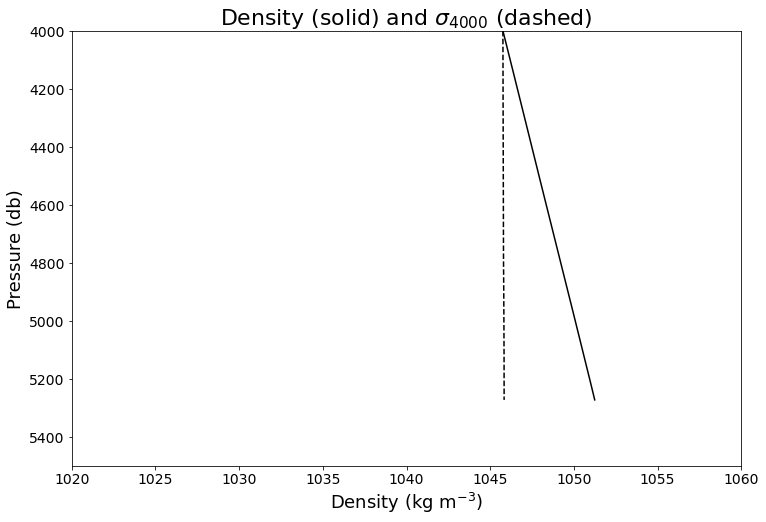

In [8]:
plt.figure(figsize=(12,8))
plt.plot(density,pressure,'k-')
plt.plot(sigma4000,pressure,'k--')
plt.ylim(5500,4000)
plt.xlim(1020,1060)
plt.xlabel('Density (kg m$^{-3}$)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Density (solid) and $\sigma_{4000}$ (dashed)',fontsize=22)
plt.savefig('density_sigma4000.png')

In [9]:
sound_speed = gsw.sound_speed(salinity,cons_temperature,pressure)

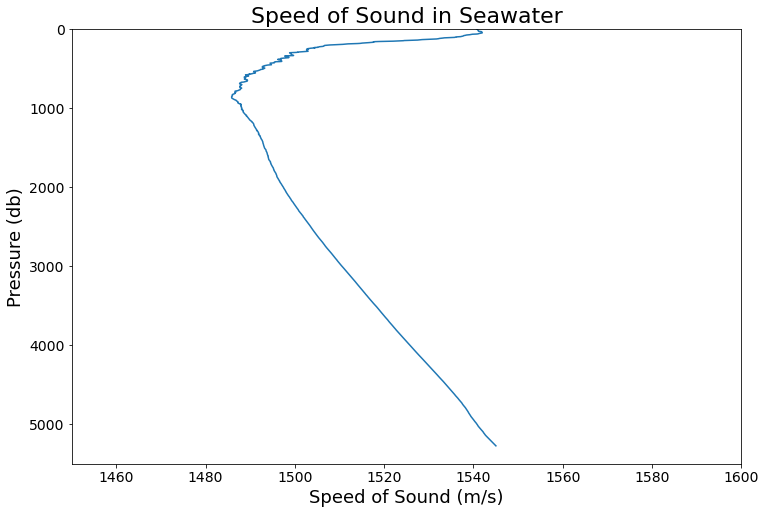

In [10]:
plt.figure(figsize=(12,8))
plt.plot(sound_speed,pressure)
plt.ylim(5500,0)
plt.xlim(1450,1600)
plt.xlabel('Speed of Sound (m/s)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Speed of Sound in Seawater',fontsize=22)
plt.savefig('sound_speed.png')

3. a) Plot shown above. b) The speed of sound in the ocean is much greater than the speed of sound in the air because water is much less compressible than air and sound is a compression wave. c) The sound speed is at a minimum around 1000 db.

In [11]:
heat_capacity = gsw.cp_t_exact(salinity,temperature,pressure)

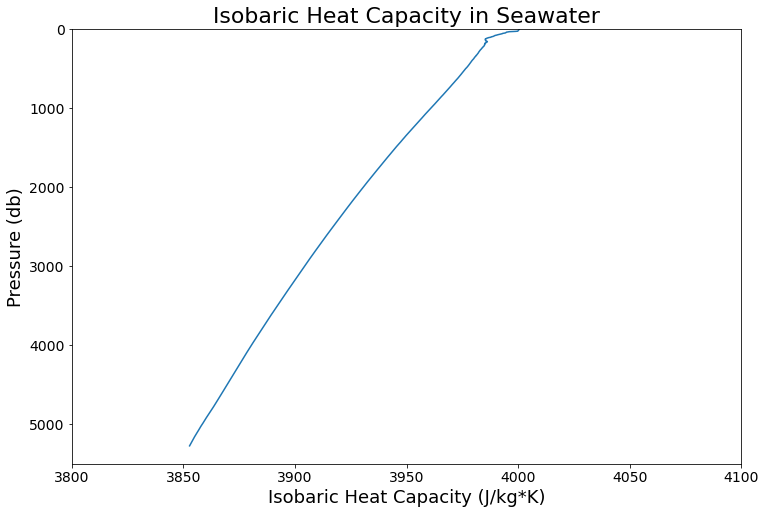

In [12]:
plt.figure(figsize=(12,8))
plt.plot(heat_capacity,pressure)
plt.ylim(5500,0)
plt.xlim(3800,4100)
plt.xlabel('Isobaric Heat Capacity (J/kg*K)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Isobaric Heat Capacity in Seawater',fontsize=22)
plt.savefig('heat_capacity.png')

4. a) Plot shown above. b) The heat capacity of seawater is much greater than the heat capacity of air. c) If we calculated the heat transport of the ocean using a constant value of heat capacity, we could be making an error up to 150 J/kgK as that is how much heat capacity changes with depth in the ocean (or up to 75 J/kgK if we used the average heat capacity).

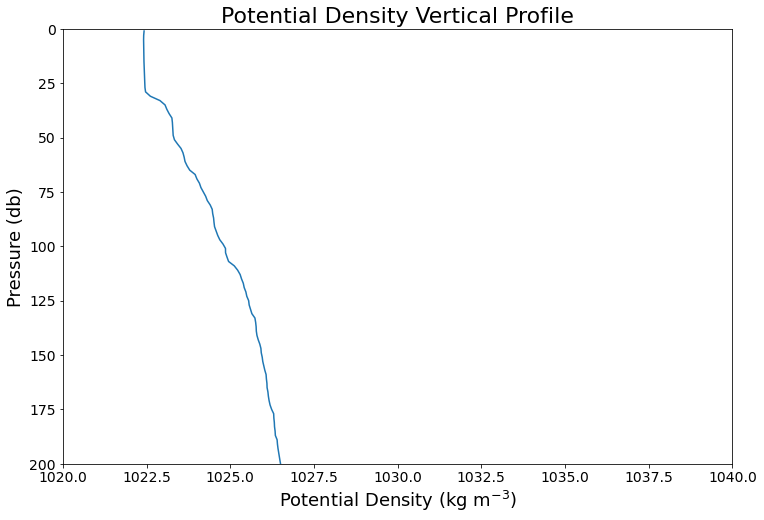

In [13]:
plt.figure(figsize=(12,8))
plt.plot(sigma0,pressure)
plt.ylim(200,0)
plt.xlim(1020,1040)
plt.xlabel('Potential Density (kg m$^{-3}$)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Potential Density Vertical Profile',fontsize=22)
plt.savefig('potentialdensity.png')

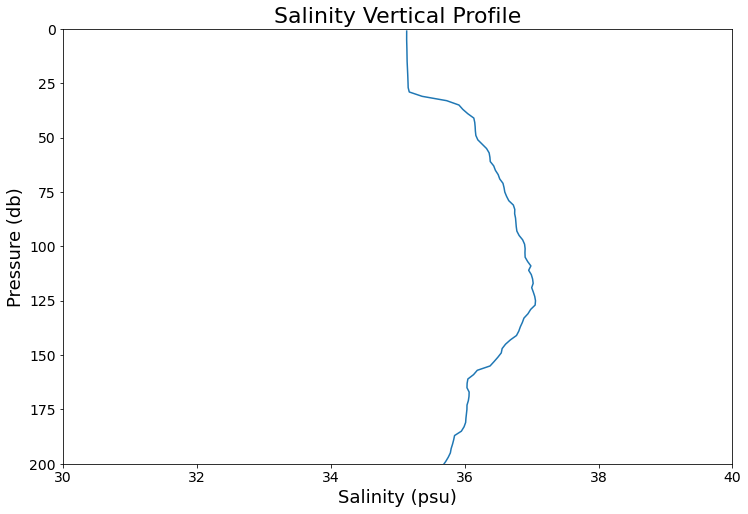

In [14]:
plt.figure(figsize=(12,8))
plt.plot(salinity,pressure)
plt.ylim(200,0)
plt.xlim(30,40)
plt.xlabel('Salinity (psu)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Salinity Vertical Profile',fontsize=22)
plt.savefig('salinity.png')

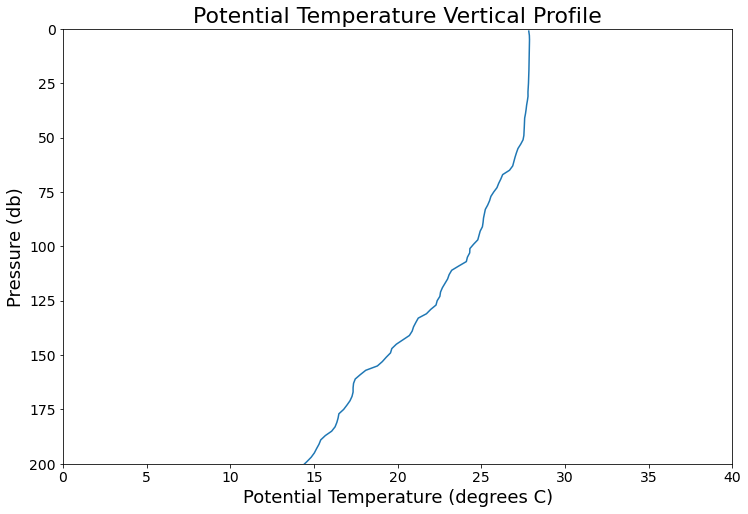

In [15]:
plt.figure(figsize=(12,8))
plt.plot(potentialtemp,pressure)
plt.ylim(200,0)
plt.xlim(0,40)
plt.xlabel('Potential Temperature (degrees C)',fontsize=18)
plt.ylabel('Pressure (db)',fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.title('Potential Temperature Vertical Profile',fontsize=22)
plt.savefig('potentialtemperature.png')

5. a) Plots shown above. b) Yes I see a very well mixed region. The upper ~25 db of all three graphs are relatively uniform.